In [4]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
# import easydict
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [33]:
def show_cifer(testloader, classes):
    H = 4
    W = 4
    fig = plt.figure(figsize=(H, W))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1.0, hspace=0.4, wspace=0.4)

    for i, (images, labels) in enumerate(testloader, 0):

        for k in range(0, images.size()[0]):
            # numpyに変換後、[3, 32, 32] -> [32, 32, 3] に変換
            numpy_array = images[k].numpy().transpose((1, 2, 0))
            plt.subplot(H, W, k+1)
            plt.imshow(numpy_array)
            plt.title("{}:{}".format(k, classes[labels[k]]), fontsize=12, color = "black")
            plt.axis('off')

        break

    plt.show()

Files already downloaded and verified


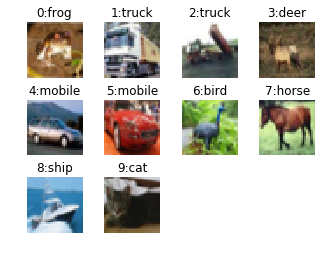

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transform)
     
# testset = torchvision.datasets.CIFAR10(root='./data', 
#                                         train=False, 
#                                         download=True, 
#                                         transform=transform)

# trainloader = torch.utils.data.DataLoader(trainset,
#                                             batch_size=100,
#                                             shuffle=True,
#                                             num_workers=2)

# testloader = torch.utils.data.DataLoader(testset, 
#                                             batch_size=100,
#                                             shuffle=False, 
#                                             num_workers=2)

N = int(len(trainset) / 2)
indices = np.arange(2 * N)
A, B = indices[:N], indices[N:]
A_loader = torch.utils.data.DataLoader(
            torch.utils.data.Subset(trainset, A), batch_size=10)

cifar10_labels = np.array([
    'airplane',
    'mobile', # auto
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

show_cifer(A_loader, cifar10_labels)